In [1]:
import pandas as pd

orderdetailsdf = pd.read_excel(r'Order Details.xlsx')
orderdetailsdf.head()

,Order ID,Product,Unit Price,Quantity,Discount
0,10248,Queso Cabrales,14.0,12,0.0
1,10248,Singaporean Hokkien Fried Mee,9.8,10,0.0
2,10248,Mozzarella di Giovanni,34.8,5,0.0
3,10249,Tofu,18.6,9,0.0
4,10249,Manjimup Dried Apples,42.4,40,0.0


In [2]:
orderdetailsdf['Unit Price'] =  orderdetailsdf['Unit Price'] - (orderdetailsdf['Discount'] * orderdetailsdf['Unit Price'])

In [3]:
orderdetailsdf.head()

,Order ID,Product,Unit Price,Quantity,Discount
0,10248,Queso Cabrales,14.0,12,0.0
1,10248,Singaporean Hokkien Fried Mee,9.8,10,0.0
2,10248,Mozzarella di Giovanni,34.8,5,0.0
3,10249,Tofu,18.6,9,0.0
4,10249,Manjimup Dried Apples,42.4,40,0.0


In [4]:
#inspeksi data ordersdf 
ordersdf = pd.read_excel(r'Orders.xlsx')
ordersdf.head()

,Order ID,Customer,Employee,Order Date,Required Date,Shipped Date,Ship Via,Freight,Ship Name,Ship Address,Ship City,Ship Region,Ship Postal Code,Ship Country
0,10248,Vins et alcools Chevalier,"Buchanan, Steven",1994-08-04,1994-09-01,1994-08-16,Federal Shipping,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France
1,10249,Toms Spezialitäten,"Suyama, Michael",1994-08-05,1994-09-16,1994-08-10,Speedy Express,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany
2,10250,Hanari Carnes,"Peacock, Margaret",1994-08-08,1994-09-05,1994-08-12,United Package,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,Victuailles en stock,"Leverling, Janet",1994-08-08,1994-09-05,1994-08-15,Speedy Express,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,10252,Suprêmes délices,"Peacock, Margaret",1994-08-09,1994-09-06,1994-08-11,United Package,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium


In [5]:
new_df = ordersdf.set_index('Order ID').combine_first(orderdetailsdf.set_index('Order ID')).reset_index()
new_df.head()

,Order ID,Customer,Discount,Employee,Freight,Order Date,Product,Quantity,Required Date,Ship Address,Ship City,Ship Country,Ship Name,Ship Postal Code,Ship Region,Ship Via,Shipped Date,Unit Price
0,10248,Vins et alcools Chevalier,0.0,"Buchanan, Steven",32.38,1994-08-04,Queso Cabrales,12.0,1994-09-01,59 rue de l'Abbaye,Reims,France,Vins et alcools Chevalier,51100,NaN,Federal Shipping,1994-08-16,14.0
1,10248,Vins et alcools Chevalier,0.0,"Buchanan, Steven",32.38,1994-08-04,Singaporean Hokkien Fried Mee,10.0,1994-09-01,59 rue de l'Abbaye,Reims,France,Vins et alcools Chevalier,51100,NaN,Federal Shipping,1994-08-16,9.8
2,10248,Vins et alcools Chevalier,0.0,"Buchanan, Steven",32.38,1994-08-04,Mozzarella di Giovanni,5.0,1994-09-01,59 rue de l'Abbaye,Reims,France,Vins et alcools Chevalier,51100,NaN,Federal Shipping,1994-08-16,34.8
3,10249,Toms Spezialitäten,0.0,"Suyama, Michael",11.61,1994-08-05,Tofu,9.0,1994-09-16,Luisenstr. 48,Münster,Germany,Toms Spezialitäten,44087,NaN,Speedy Express,1994-08-10,18.6
4,10249,Toms Spezialitäten,0.0,"Suyama, Michael",11.61,1994-08-05,Manjimup Dried Apples,40.0,1994-09-16,Luisenstr. 48,Münster,Germany,Toms Spezialitäten,44087,NaN,Speedy Express,1994-08-10,42.4


In [6]:
new_df = new_df[['Order ID', 'Order Date', 'Product', 'Unit Price', 'Quantity']]

In [7]:
new_df

,Order ID,Order Date,Product,Unit Price,Quantity
0,10248,1994-08-04,Queso Cabrales,14.0000,12.0
1,10248,1994-08-04,Singaporean Hokkien Fried Mee,9.8000,10.0
2,10248,1994-08-04,Mozzarella di Giovanni,34.8000,5.0
3,10249,1994-08-05,Tofu,18.6000,9.0
4,10249,1994-08-05,Manjimup Dried Apples,42.4000,40.0
...,...,...,...,...,...
2150,11077,1996-06-05,Wimmers gute Semmelknödel,32.2525,2.0
2151,11077,1996-06-05,Louisiana Hot Spiced Okra,17.0000,1.0
2152,11077,1996-06-05,Röd Kaviar,14.8500,2.0
2153,11077,1996-06-05,Rhönbräu Klosterbier,7.7500,4.0


In [8]:
new_df['Order Date'] = new_df['Order Date'].dt.strftime('%Y-%m')

In [9]:
new_df

,Order ID,Order Date,Product,Unit Price,Quantity
0,10248,1994-08,Queso Cabrales,14.0000,12.0
1,10248,1994-08,Singaporean Hokkien Fried Mee,9.8000,10.0
2,10248,1994-08,Mozzarella di Giovanni,34.8000,5.0
3,10249,1994-08,Tofu,18.6000,9.0
4,10249,1994-08,Manjimup Dried Apples,42.4000,40.0
...,...,...,...,...,...
2150,11077,1996-06,Wimmers gute Semmelknödel,32.2525,2.0
2151,11077,1996-06,Louisiana Hot Spiced Okra,17.0000,1.0
2152,11077,1996-06,Röd Kaviar,14.8500,2.0
2153,11077,1996-06,Rhönbräu Klosterbier,7.7500,4.0


In [10]:
new_df['Unit Price'] = new_df['Unit Price'] * new_df['Quantity']

In [11]:
new_df

,Order ID,Order Date,Product,Unit Price,Quantity
0,10248,1994-08,Queso Cabrales,168.000,12.0
1,10248,1994-08,Singaporean Hokkien Fried Mee,98.000,10.0
2,10248,1994-08,Mozzarella di Giovanni,174.000,5.0
3,10249,1994-08,Tofu,167.400,9.0
4,10249,1994-08,Manjimup Dried Apples,1696.000,40.0
...,...,...,...,...,...
2150,11077,1996-06,Wimmers gute Semmelknödel,64.505,2.0
2151,11077,1996-06,Louisiana Hot Spiced Okra,17.000,1.0
2152,11077,1996-06,Röd Kaviar,29.700,2.0
2153,11077,1996-06,Rhönbräu Klosterbier,31.000,4.0


In [12]:
order_date_unique = new_df['Order Date'].unique()
order_date_unique

array(['1994-08', '1994-09', '1994-10', '1994-11', '1994-12', '1995-01',
       '1995-02', '1995-03', '1995-04', '1995-05', '1995-06', '1995-07',
       '1995-08', '1995-09', '1995-10', '1995-11', '1995-12', '1996-01',
       '1996-02', '1996-03', '1996-04', '1996-05', '1996-06'],
      dtype=object)

In [13]:
products_unique = new_df['Product'].unique()
len(products_unique)

77

In [14]:
new_df[new_df['Order Date'] == '1994-09']

,Order ID,Order Date,Product,Unit Price,Quantity
59,10270,1994-09,Inlagd Sill,456.0,30.0
60,10270,1994-09,Ipoh Coffee,920.0,25.0
61,10271,1994-09,Geitost,48.0,24.0
62,10272,1994-09,Sir Rodney's Marmalade,388.8,6.0
63,10272,1994-09,Gorgonzola Telino,400.0,40.0
...,...,...,...,...,...
123,10294,1994-09,Chai,259.2,18.0
124,10294,1994-09,Alice Mutton,468.0,15.0
125,10294,1994-09,Ipoh Coffee,552.0,15.0
126,10294,1994-09,Camembert Pierrot,571.2,21.0


In [15]:
new_df.rename(columns={'Unit Price':'Total Price'},inplace=True)

In [16]:
def extraction(new_df, order_date_unique, products_unique):
    list_item_average_one_month = []
    
    for month in order_date_unique:
        item_month = new_df[new_df['Order Date'] == month]
        for item in products_unique:
            item_specific = item_month[item_month['Product'] == item]
            length = len(item_specific)
            item_specific_average = ((item_specific['Total Price'].sum())/length)
    #         print("Rata-rata produk {} pada bulan {} adalah {}".format(item, month, item_specific_sum))
            list_item_average_one_month.append(item_specific_average)
        
    return list_item_average_one_month

In [17]:
big_list = extraction(new_df, order_date_unique, products_unique)

<ipython-input-16-5c71e87baddd>:9: RuntimeWarning: invalid value encountered in double_scalars
  item_specific_average = ((item_specific['Total Price'].sum())/length)


In [18]:
len(big_list)

1771

In [19]:
big_list = [0 if x != x else x for x in big_list]

In [20]:
chunked_big_list = list()
chunk_size = 77

for i in range(0, len(big_list), chunk_size):
    chunked_big_list.append(big_list[i:i+chunk_size])
print(chunked_big_list)

[[168.0, 98.0, 271.1333333333334, 167.4, 1478.6999999999998, 111.00833333333333, 275.1, 95.76, 501.15, 2462.3999999999996, 80.75, 1088.0, 200.0, 345.6, 640.0, 73.35, 342.72, 192.0, 481.3333333333333, 556.0, 380.0, 1969.0, 393.0, 140.4, 877.5, 523.6, 122.88, 120.0, 20.8, 443.24999999999994, 214.5, 288.0, 360.0, 60.8, 931.4999999999999, 936.0, 346.56, 735.0, 183.6, 990.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 315.06666666666666, 0, 76.32, 0, 0, 0, 31.2, 842.4, 44.0, 643.7333333333332, 271.25, 0, 240.0, 35.46, 384.0, 0, 0, 472.6, 456.0, 455.4, 754.5600000000001, 104.0, 394.87500000000006, 340.0, 0, 0, 0, 1024.4, 0, 748.8, 0, 0, 124.19999999999999, 409.5, 0, 654.15, 451.44, 1485.0, 736.0, 468.72, 344.0, 67.2, 728.0, 302.76666666666665, 228.15, 300.0, 86.8, 69.35000000000001, 248.0, 41.99999999999999, 388.79999999999995, 224.0, 122.4, 53.10000000000001, 27.0, 240.0, 239.4, 600.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [21]:
len(chunked_big_list)

23

In [22]:
chunked_big_list[0] #month1

[168.0,
 98.0,
 271.1333333333334,
 167.4,
 1478.6999999999998,
 111.00833333333333,
 275.1,
 95.76,
 501.15,
 2462.3999999999996,
 80.75,
 1088.0,
 200.0,
 345.6,
 640.0,
 73.35,
 342.72,
 192.0,
 481.3333333333333,
 556.0,
 380.0,
 1969.0,
 393.0,
 140.4,
 877.5,
 523.6,
 122.88,
 120.0,
 20.8,
 443.24999999999994,
 214.5,
 288.0,
 360.0,
 60.8,
 931.4999999999999,
 936.0,
 346.56,
 735.0,
 183.6,
 990.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [23]:
Côte_de_Blaye = []
for index in range(23):
    Côte_de_Blaye.append(chunked_big_list[index][37])

In [24]:
Côte_de_Blaye

[735.0,
 654.15,
 338.09999999999997,
 0,
 58.8,
 0,
 26.459999999999997,
 422.62499999999994,
 224.175,
 230.0,
 187.06666666666663,
 478.3999999999999,
 772.8,
 1104.0,
 633.8799999999999,
 0,
 409.40000000000003,
 18.4,
 650.1333333333333,
 947.5999999999999,
 276.0,
 306.6666666666667,
 0]

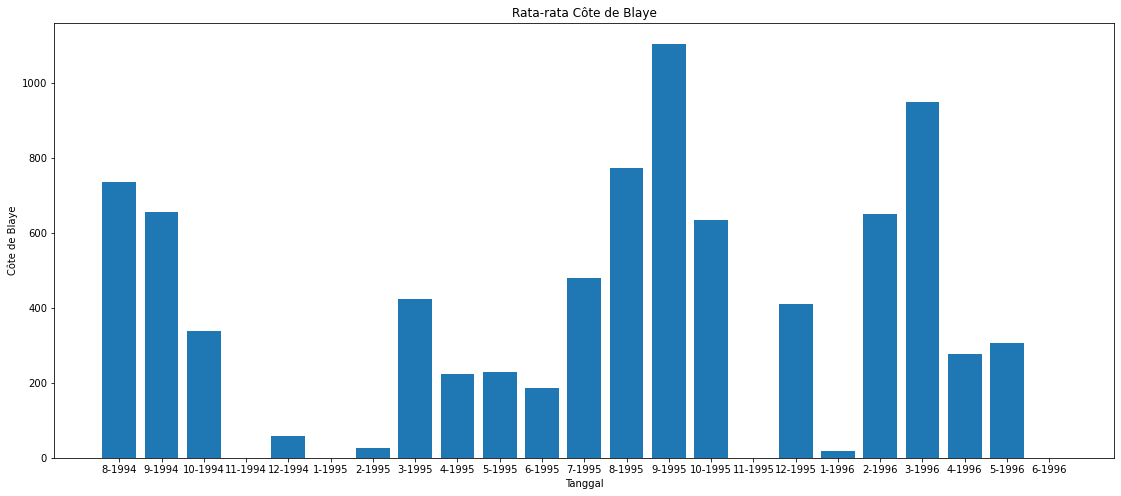

In [25]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (19, 8)

xAxis = ['8-1994','9-1994','10-1994','11-1994','12-1994','1-1995','2-1995','3-1995','4-1995','5-1995','6-1995','7-1995'
         ,'8-1995','9-1995','10-1995','11-1995','12-1995','1-1996','2-1996','3-1996','4-1996','5-1996', '6-1996']

yAxis = Côte_de_Blaye

plt.bar(xAxis,yAxis)
plt.title('Rata-rata Côte de Blaye')
plt.ylabel('Côte de Blaye')
plt.xlabel('Tanggal')
plt.show()

In [26]:
Thüringer_Rostbratwurst= []
for index in range(23):
    Thüringer_Rostbratwurst.append(chunked_big_list[index][28])

In [27]:
Thüringer_Rostbratwurst

[20.8,
 0,
 0,
 582.4,
 0,
 0,
 208.0,
 0,
 0,
 0,
 421.2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1248.0,
 0,
 208.0,
 0,
 0]

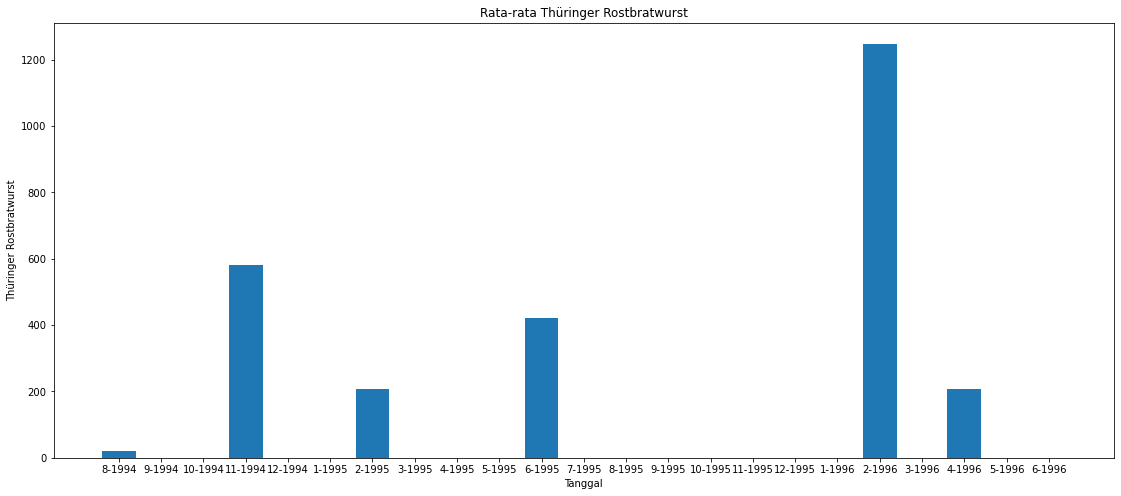

In [28]:
plt.rcParams["figure.figsize"] = (19, 8)

xAxis = ['8-1994','9-1994','10-1994','11-1994','12-1994','1-1995','2-1995','3-1995','4-1995','5-1995','6-1995','7-1995'
         ,'8-1995','9-1995','10-1995','11-1995','12-1995','1-1996','2-1996','3-1996','4-1996','5-1996', '6-1996']

yAxis = Thüringer_Rostbratwurst

plt.bar(xAxis,yAxis)
plt.title('Rata-rata Thüringer Rostbratwurst')
plt.ylabel('Thüringer Rostbratwurst')
plt.xlabel('Tanggal')
plt.show()

In [29]:
Raclette_Courdavault = []
for index in range(23):
    Raclette_Courdavault.append(chunked_big_list[index][58])

In [30]:
Raclette_Courdavault

[0,
 239.4,
 0,
 0,
 1083.95,
 798.0,
 186.20000000000002,
 571.9000000000001,
 505.4,
 0,
 0,
 578.5500000000001,
 0,
 299.25,
 689.9375,
 0,
 798.0,
 931.0,
 860.34375,
 569.40625,
 199.5,
 665.0,
 2193.5025]

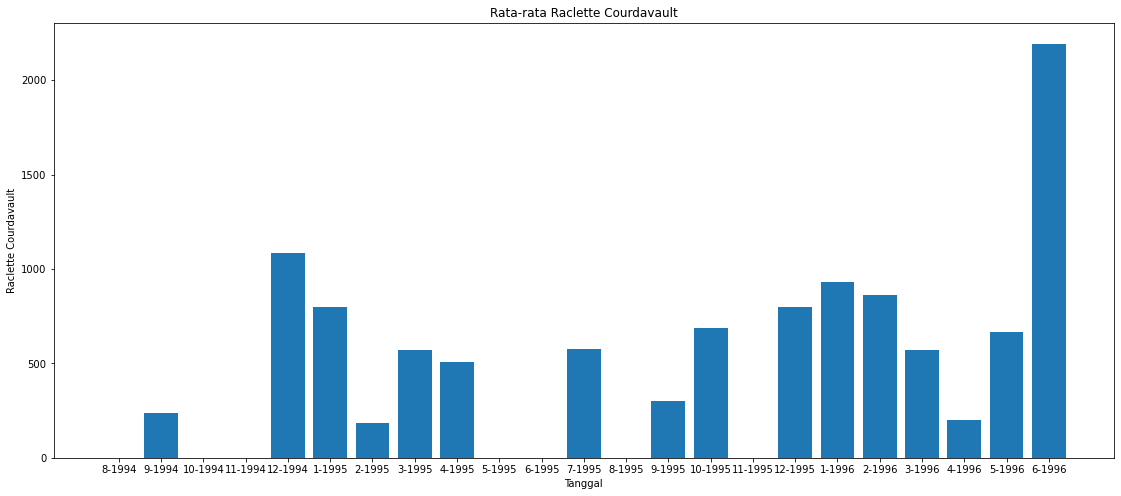

In [31]:
plt.rcParams["figure.figsize"] = (19, 8)

xAxis = ['8-1994','9-1994','10-1994','11-1994','12-1994','1-1995','2-1995','3-1995','4-1995','5-1995','6-1995','7-1995'
         ,'8-1995','9-1995','10-1995','11-1995','12-1995','1-1996','2-1996','3-1996','4-1996','5-1996', '6-1996']

yAxis = Raclette_Courdavault

plt.bar(xAxis,yAxis)
plt.title('Rata-rata Raclette Courdavault')
plt.ylabel('Raclette Courdavault')
plt.xlabel('Tanggal')
plt.show()

In [32]:
Spegesild = []
for index in range(23):
    Spegesild.append(chunked_big_list[index][47])

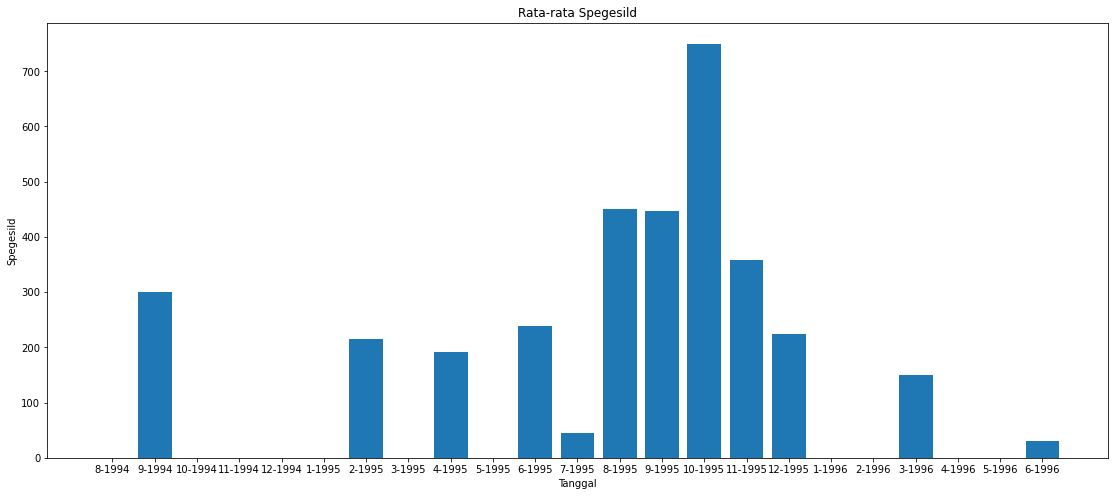

In [33]:
plt.rcParams["figure.figsize"] = (19, 8)

xAxis = ['8-1994','9-1994','10-1994','11-1994','12-1994','1-1995','2-1995','3-1995','4-1995','5-1995','6-1995','7-1995'
         ,'8-1995','9-1995','10-1995','11-1995','12-1995','1-1996','2-1996','3-1996','4-1996','5-1996', '6-1996']

yAxis = Spegesild

plt.bar(xAxis,yAxis)
plt.title('Rata-rata Spegesild')
plt.ylabel('Spegesild')
plt.xlabel('Tanggal')
plt.show()

### Dari data diatas dapat kita lihat bahwa terdapat produk yang penjualan rata-rata per bulannya naik, contohnya Côte_de_Blaye, Thüringer_Rostbratwurst, dan Raclette_Courdavault. Sedangkan contoh produk yang rata-rata per bulannya turun adalah Spegesild.